### Clustering Example: Setting EV Chargers for Car2go

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# read car2go data
car2go = pd.read_csv('/content/drive/My Drive/GW_Class/DNSC6315/Lec 5 Clustering and PCA/car2go_charger.csv')
print(car2go.head())

   Unnamed: 0                                        address  charging  \
0           1                   E 11th St 1487, 78702 Austin       NaN   
1           2                    E 1st St 2384, 78702 Austin       NaN   
2           3  The Enclave - 1005 W Stassney Lane - 2 Spaces       NaN   
3           4                     Krebs Ln 149, 78704 Austin       NaN   
4           5                    W 16th St 471, 78701 Austin       NaN   

  engineType exterior  fuel interior      name  smartPhoneRequired  \
0         CE     GOOD   100     GOOD  CSF 9069               False   
1         CE     GOOD    24     GOOD  FBV 4383               False   
2         CE     GOOD   100     GOOD  FBV 4428               False   
3         CE     GOOD    36     GOOD  CSG 1541               False   
4         CE     GOOD    90     GOOD  FJC 9793               False   

                 vin    City  Longitude  Latitude  Altitude  
0  WMEEJ3BA7EK733766  austin  -97.72514  30.26766         0  
1  WMEEJ3B

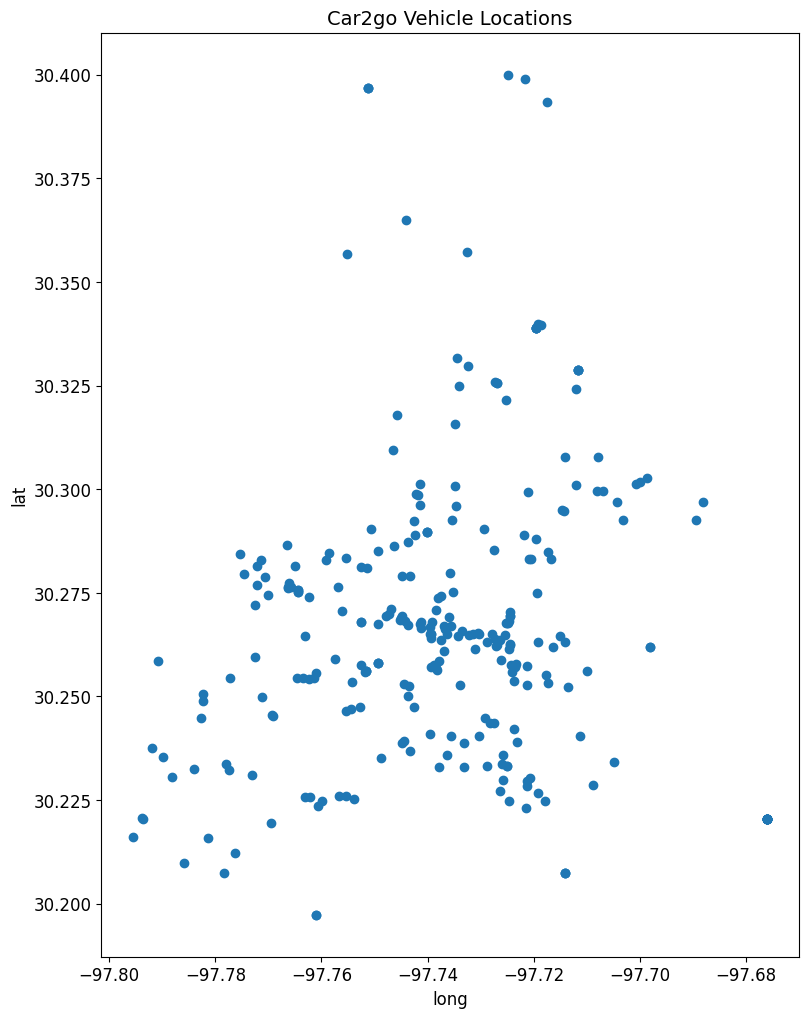

In [3]:
# only keep the coordinates
X_car=car2go[['Longitude', 'Latitude']]

# show the data points
plt.figure(figsize=(9,12))
plt.scatter(X_car['Longitude'], X_car['Latitude'])
plt.title('Car2go Vehicle Locations', fontsize=14)
plt.xlabel('long',  fontsize=12)
plt.ylabel('lat',  fontsize=12)
plt.tick_params(labelsize=12)

## If you want to add a map layer
- geopandas (need shape file)
- folium

In [ ]:
# !pip install folium

In [4]:
import folium

# Define the center of the map
center_lat = X_car["Latitude"].mean()
center_lon = X_car["Longitude"].mean()

# Create a map centered around the mean coordinates
m = folium.Map(location=[center_lat, center_lon], zoom_start=13)

# Define the markers
markers = set([(lat, lon) for lat, lon in zip(X_car["Latitude"], X_car["Longitude"])])

# Add markers
for lat, lon in markers:
    folium.Marker([lat, lon]).add_to(m)

# Display the map
m

## K-means Clustering

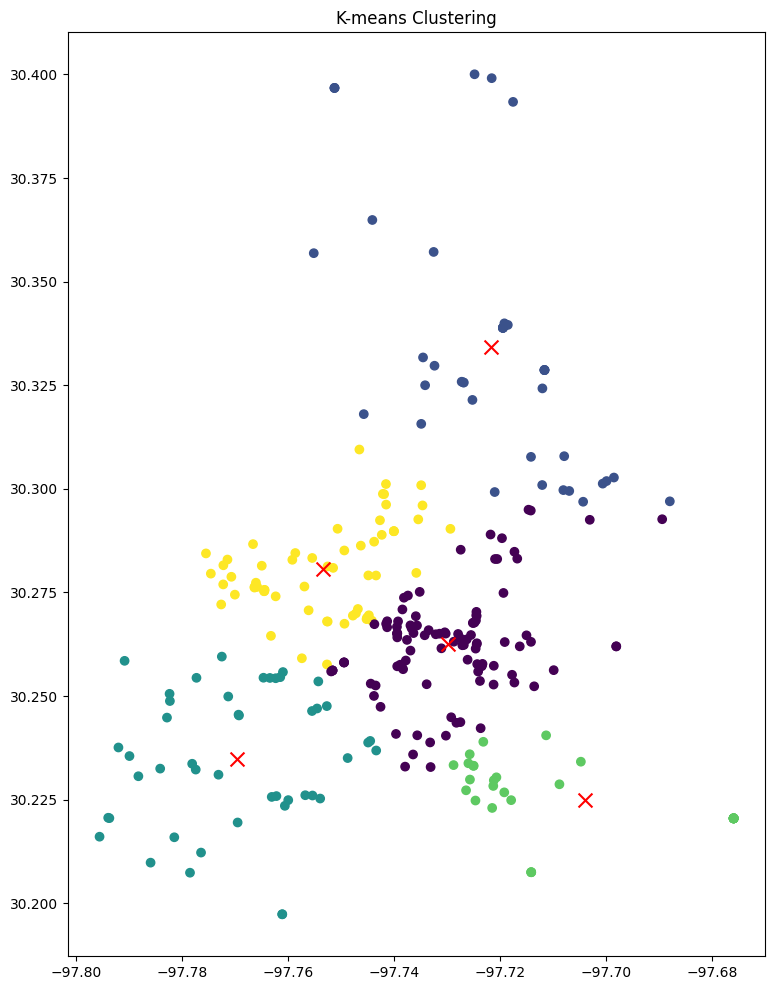

In [5]:
# K-means clustering
from sklearn.cluster import KMeans
K=5 # you may choose your own K
kmeans = KMeans(n_clusters=K, random_state=0)

# cluster membership for each data point
clusters=kmeans.fit_predict(X_car)
# get centroids
centers = kmeans.cluster_centers_

# plot the clusters and centroids
plt.figure(figsize=(9,12))
plt.scatter(X_car['Longitude'], X_car['Latitude'], c=clusters)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100);
plt.title("K-means Clustering")
plt.show()

### If you want to add a map layer

In [6]:
# Define the center of the map
center_lat = X_car["Latitude"].mean()
center_lon = X_car["Longitude"].mean()

# Create a map centered around the mean coordinates
m = folium.Map(location=[center_lat, center_lon], zoom_start=13)

# Define the markers for center locations and other locations
markers_center = set([(lat, lon) for lat, lon in zip(centers[:,1], centers[:,0])])
markers_other = set([(lat, lon) for lat, lon in zip(X_car["Latitude"], X_car["Longitude"])])

# Subtract the center markers from the other markers
markers_other = markers_other - markers_center

# Add markers for center locations with red color
for lat, lon in markers_center:
    folium.Marker([lat, lon], icon=folium.Icon(color='red')).add_to(m)

# Add markers for other locations
for lat, lon in markers_other:
    folium.Marker([lat, lon]).add_to(m)

# Display the map
m

In [10]:
# prompt: in the above folium, show centers and different cluster of points using colors

# Define the center of the map
center_lat = X_car["Latitude"].mean()
center_lon = X_car["Longitude"].mean()

# Create a map centered around the mean coordinates
m = folium.Map(location=[center_lat, center_lon], zoom_start=13)

# Define colors for different clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

# Add markers for each data point with cluster-specific colors
for i in range(len(X_car)):
    folium.CircleMarker(
        location=[X_car.iloc[i]['Latitude'], X_car.iloc[i]['Longitude']],
        radius=5,
        color=colors[clusters[i] % len(colors)],  # Assign color based on cluster
        fill=True,
        fill_color=colors[clusters[i] % len(colors)],
        fill_opacity=0.6
    ).add_to(m)

# Add markers for center locations with a distinct style (e.g., larger size, different color)
for i, center in enumerate(centers):
    folium.Marker([center[1], center[0]], icon=folium.Icon(color='red')).add_to(m) # note Lat and Long swapped

# Display the map
m


## WSS vs # of Clusters

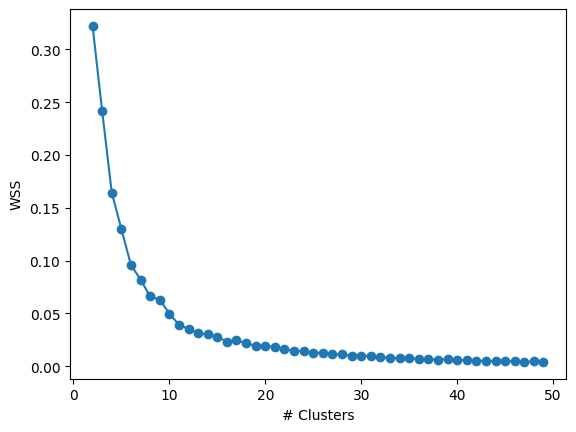

In [12]:
# K-means clustering
from sklearn.cluster import KMeans

cluster_range = range(2,50)
cluster_wss = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster)
    clusters.fit(X_car)
    cluster_wss.append(clusters.inertia_)

plt.xlabel('# Clusters')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker = 'o')
plt.show()

## pyclustering package for kmedians and kmedoids

In [14]:
# !pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=dadf3a2ab0df46280500cbdb4cb995902fffcc3c0fd6054b3223e3bece8bd632
  Stored in directory: /root/.cache/pip/wheels/9f/99/15/e881f46a92690ae77c2e3b255b89ea45d3a867b1b6c2ab3ba9
Successfully built pyclustering


## kmedians

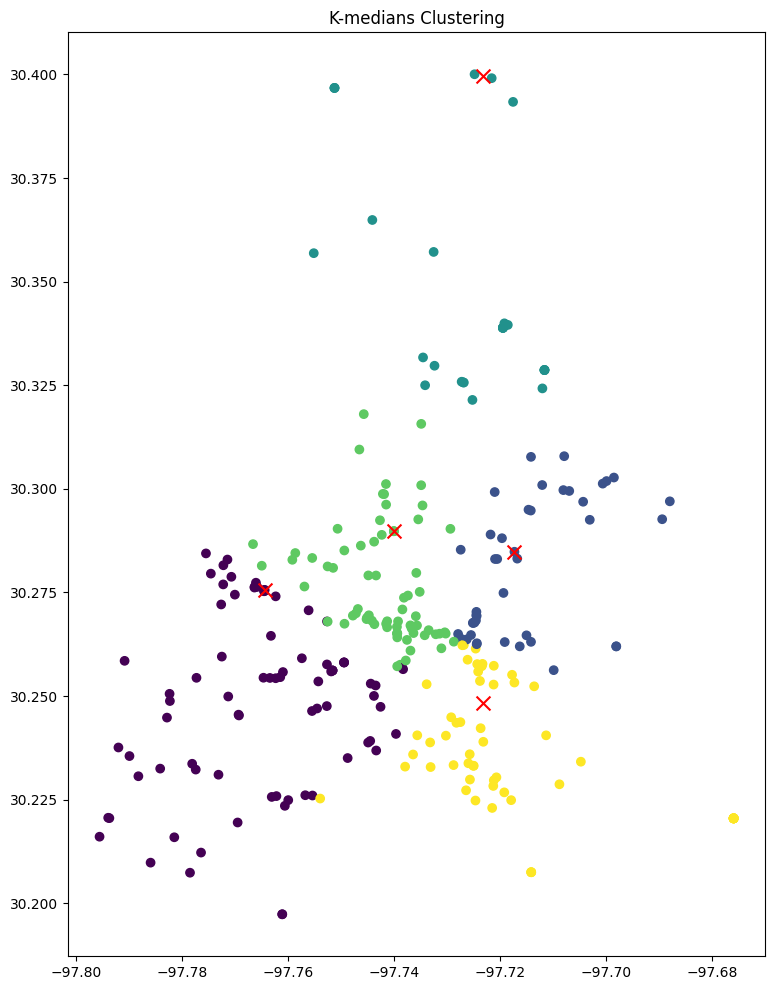

In [15]:
# install package pyclustering (to the right directory...carefully)
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.utils.metric import distance_metric, type_metric


K=5
# Create instance of K-Medians algorithm.
initial_medians = random_center_initializer(X_car.values,K).initialize() # randomly initialize centers

# Define the Manhattan distance metric
manhattan_metric = distance_metric(type_metric.MANHATTAN)
kmedians_instance = kmedians(X_car.values.tolist(),initial_medians,metric=manhattan_metric)

# Run cluster analysis and obtain results.
kmedians_instance.process()
cluster_instances = kmedians_instance.get_clusters() # index of data points in each cluster
centers = np.array(kmedians_instance.get_medians())

clusters=np.zeros(len(X_car.index)) # initialize the membership of each point
for k in range(K):
    clusters[cluster_instances[k]]=k # label cluster membership for each point

plt.figure(figsize=(9,12))
plt.scatter(X_car['Longitude'], X_car['Latitude'], c=clusters)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100);
plt.title("K-medians Clustering")
plt.show()

## kmedoids

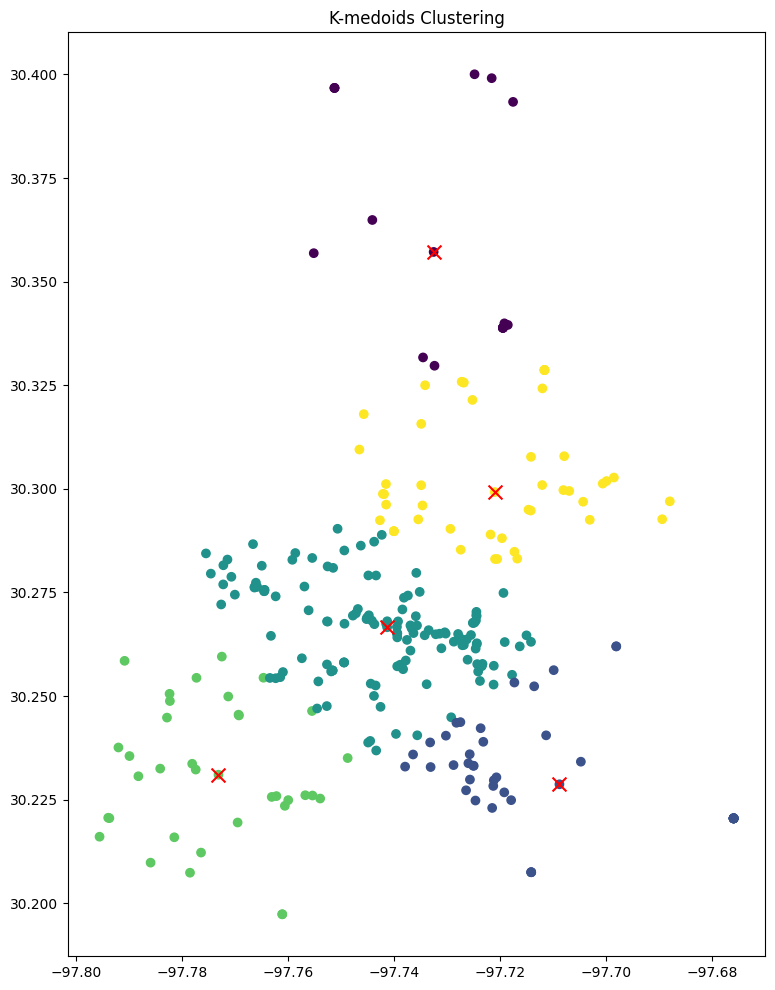

In [16]:
from pyclustering.cluster.kmedoids import kmedoids

# Set random initial medoids.
initial_medoids = [1, 50, 100, 200, 250] # provide initial medoids using indexes; here K=5.
# initial_medoids = np.random.choice(range(len(X_car)), size=K, replace=False)

# Create instance of K-Medoids algorithm.
kmedoids_instance = kmedoids(X_car.values, initial_medoids)
kmedoids_instance.process()

# Run cluster analysis and obtain results.
cluster_instances = kmedoids_instance.get_clusters() # index of data points in each cluster
center_index = kmedoids_instance.get_medoids()
centers=X_car.values[center_index,:]

clusters=np.zeros(len(X_car.index)) # initialize the membership of each point
for k in range(K):
    clusters[cluster_instances[k]]=k # label cluster membership for each point

plt.figure(figsize=(9,12))
plt.scatter(X_car['Longitude'], X_car['Latitude'], c=clusters)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100);
plt.title("K-medoids Clustering")
plt.show()

## Hierarchical Clustering using scipy


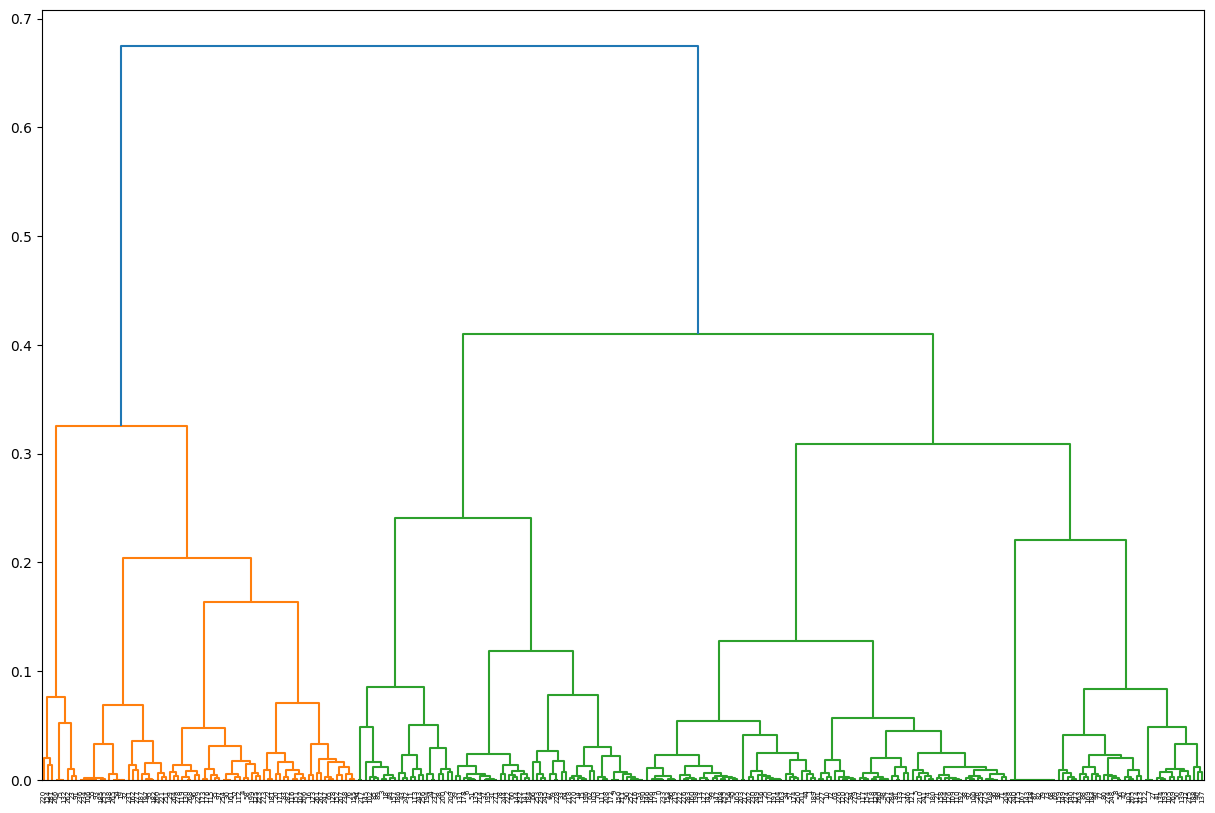

In [17]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_car, 'ward') # use ward linkage
fig = plt.figure(figsize=(15, 10)) # plot the dendrogram
dn = dendrogram(Z)

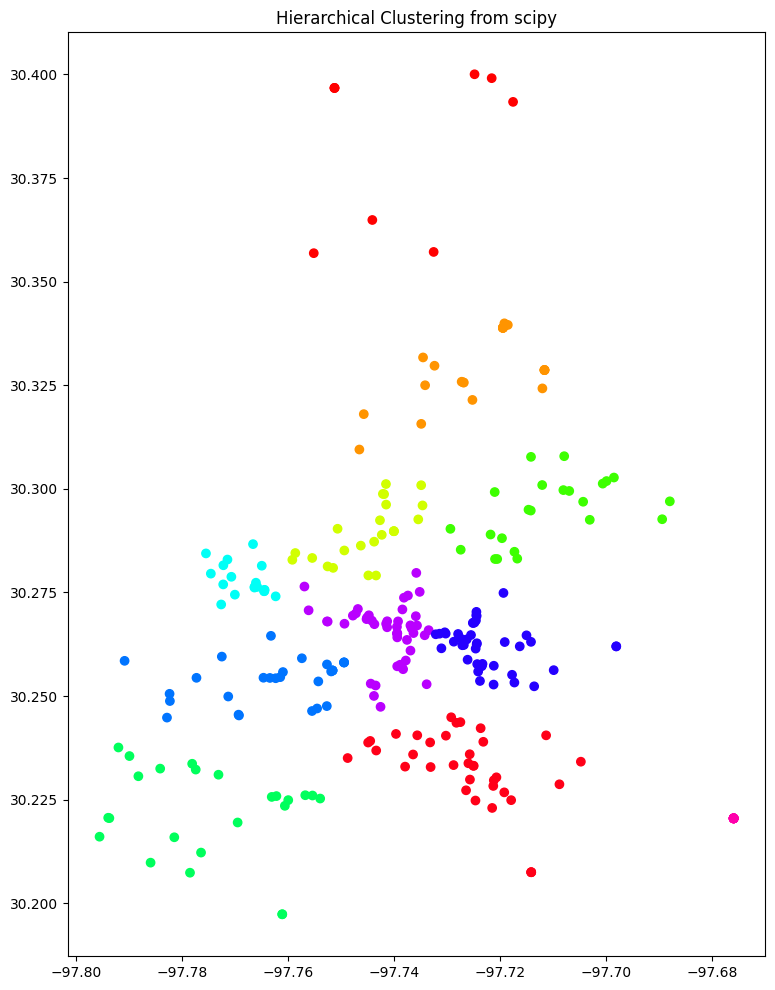

In [18]:
from scipy.cluster.hierarchy import ward, fcluster
clusters = fcluster(Z, t=0.1, criterion='distance') # get clusters by cutting the dendrogram at given distance at "t=0.1"
# print(clusters)

plt.figure(figsize=(9,12))
plt.scatter(X_car['Longitude'], X_car['Latitude'], c=clusters, cmap='hsv')
plt.title("Hierarchical Clustering from scipy")
plt.show()

# Hierarchical Clustering using sklearn


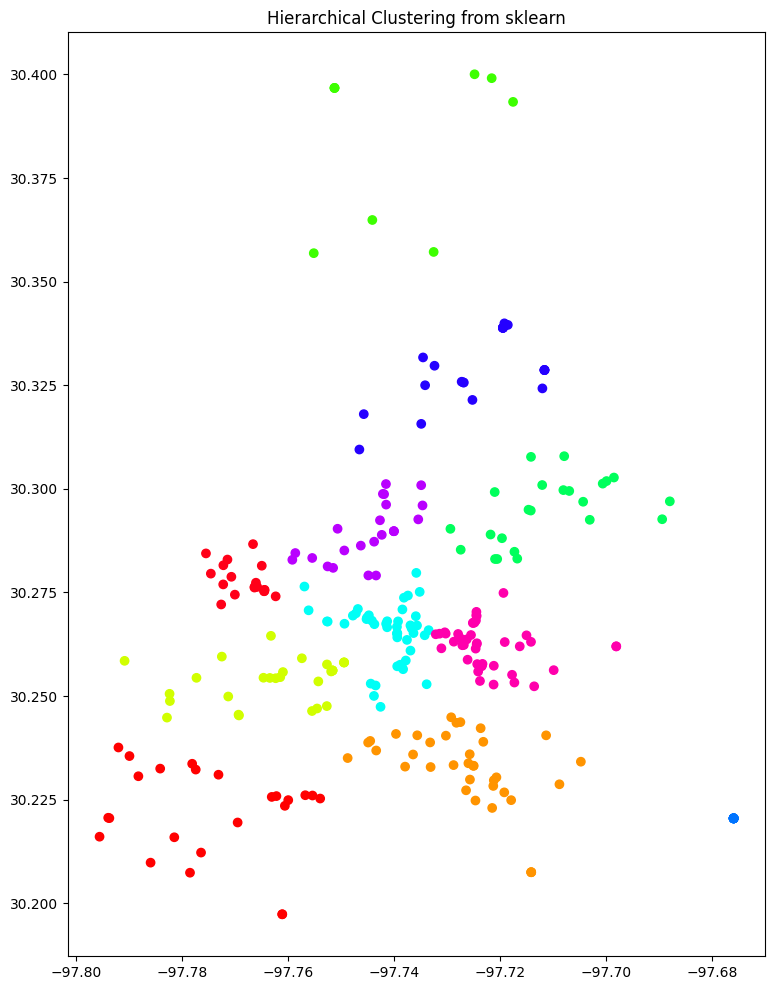

In [19]:
from sklearn.cluster import AgglomerativeClustering

# setting distance_threshold=0 ensures we compute the full tree.
HAC = AgglomerativeClustering(distance_threshold=0.1, n_clusters=None)

HAC = HAC.fit(X_car)

# cluster membership for each data point
clusters=HAC.fit_predict(X_car)

plt.figure(figsize=(9,12))
plt.scatter(X_car['Longitude'], X_car['Latitude'], c=clusters, cmap='hsv')
plt.title("Hierarchical Clustering from sklearn")
plt.show()